In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [2]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8,
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [3]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver='liblinear')

In [4]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
clf.score(X_test, y_test)

0.956140350877193

In [6]:
y_pred = clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
accuracy_score(y_test, y_pred)

0.956140350877193

In [9]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[46,  1],
       [ 4, 63]], dtype=int64)

In [10]:
clf.decision_function(X_test[12:15])

array([ 5.52818357, -1.17838919,  1.40592943])

In [11]:
clf.predict(X_test[12:15])

array([1, 0, 1])

In [12]:
(clf.decision_function(X_test[12:15]) > 0).astype(int)

array([1, 0, 1])

In [13]:
(clf.decision_function(X_test[12:15]) > 0.5).astype(int) * 2 - 1

array([ 1, -1,  1])

In [14]:
y_test[12:15]

array([1, 1, 1])

In [15]:
(clf.decision_function(X_test[12:15]) > -2).astype(int)

array([1, 1, 1])

In [16]:
(clf.decision_function(X_test[12:15]) > 2).astype(int)

array([1, 0, 0])

In [17]:
for th in range(-3, 7):
    print(th, (clf.decision_function(X_test[12:15]) > th).astype(int))

-3 [1 1 1]
-2 [1 1 1]
-1 [1 0 1]
0 [1 0 1]
1 [1 0 1]
2 [1 0 0]
3 [1 0 0]
4 [1 0 0]
5 [1 0 0]
6 [0 0 0]


In [18]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve

import matplotlib.pyplot as plt
%matplotlib inline

AUC =  0.9942838996506828


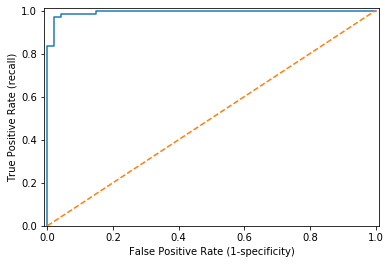

In [20]:
test_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, test_score)

plt.plot(fpr, tpr)
print("AUC = ", auc(fpr, tpr))

plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');


Text(0, 0.5, 'Precision')

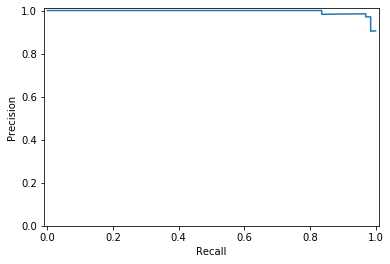

In [21]:
test_score = clf.decision_function(X_test)

precision,recall, _ = precision_recall_curve(y_test, test_score)

plt.plot(recall, precision)

plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

result AUC =  0.9942838996506828
chance AUC =  0.5265163543982216
perfect AUC =  1.0


Text(0.5, 0, 'False Positive Rate (1-specificity)')

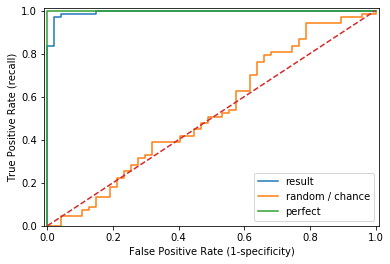

In [23]:
test_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, test_score)
plt.plot(fpr, tpr, label="result")
print("result AUC = ", auc(fpr, tpr))

test_score = np.random.uniform(size=y_test.size)
fpr, tpr, _ = roc_curve(y_test, test_score)
plt.plot(fpr, tpr, label="random / chance")
print("chance AUC = ", auc(fpr, tpr))

fpr, tpr, _ = roc_curve(y_test, y_test)
plt.plot(fpr, tpr, label="perfect")
print("perfect AUC = ", auc(fpr, tpr))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)')

Text(0, 0.5, 'Precision')

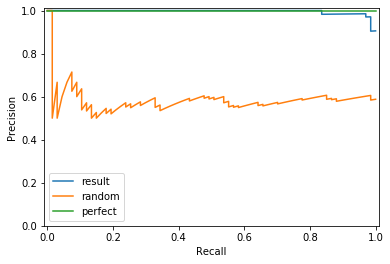

In [24]:
test_score = clf.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision,label = "result")

test_score = np.random.uniform(size=y_test.size)
precision, recall, _ = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision,label = "random")

precision, recall, _ = precision_recall_curve(y_test, y_test)
plt.plot(recall, precision,label = "perfect")

plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

In [25]:
test_score = np.random.uniform(size=y_test.size)
precision, recall, _ = precision_recall_curve(y_test, test_score)

precision_interp = np.maximum.accumulate(precision)

Text(0, 0.5, 'Precision')

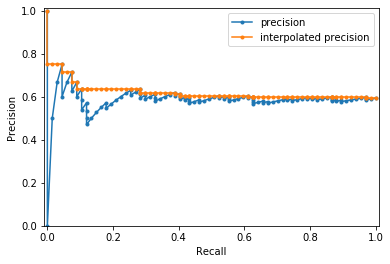

In [26]:
plt.plot(recall, precision,marker=".", label = "precision")
plt.plot(recall, precision_interp,marker=".", label = "interpolated precision")

plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

In [27]:
all_precision = np.interp(np.arange(0,1.1, 0.1),
                         recall[::-1],
                         precision_interp[::-1])
AP = all_precision.mean()

In [28]:
print(all_precision.mean())

0.6221724838713691


In [29]:
print(all_precision)
print(AP)

[0.75       0.63636364 0.63333333 0.61904762 0.61363636 0.60344828
 0.60294118 0.59793814 0.59793814 0.59633028 0.59292035]
0.6221724838713691


In [30]:
def calc_AP(precision,recall):
    precision_interp = np.maximum.accumulate(precision)
    all_precision = np.interp(np.arange(0, 1.1, 0.1), recall[::-1], precision_interp[::-1])
    AP = all_precision.mean()
    return AP

In [31]:
test_score = clf.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, test_score)
calc_AP(precision, recall)

0.9900230809321718

## 10 class problem

In [32]:
from sklearn.datasets import load_digits
data = load_digits()

X = data.data
y = data.target

In [33]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [34]:
clf.fit(X_train, y_train)

C:\Users\NDA04\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
test_score = clf.decision_function(X_test)

Text(0.5, 0, 'False Positive Rate (1-specificity)')

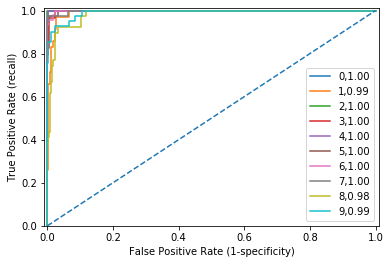

In [36]:
for i in range(10):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int),
                           test_score[:, i])
    plt.plot(fpr, tpr, label="{0},{1:.2f}".format(i, auc(fpr, tpr)))


plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)')

Text(0.5, 0, 'False Positive Rate (1-specificity)')

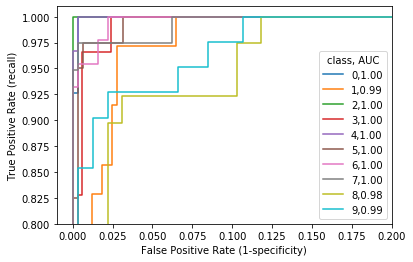

In [37]:
for i in range(10):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int),
                           test_score[:, i])
    plt.plot(fpr, tpr, label="{0},{1:.2f}".format(i, auc(fpr, tpr)))


plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best", title="class, AUC")
plt.xlim([-0.01, 0.2])
plt.ylim([0.8, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)')

Text(0, 0.5, 'Precision')

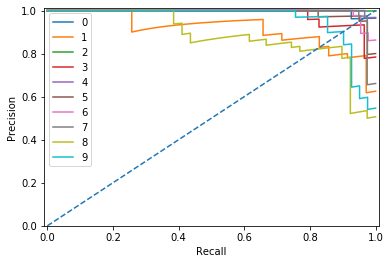

In [38]:
for i in range(10):
    precision,recall , _ = precision_recall_curve((y_test == i).astype(int),
                           test_score[:, i])
    plt.plot(recall,precision , label="{0}".format(i))


plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="best")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')

In [39]:
APs = []
for i in range(10):
    precision,recall , _ = precision_recall_curve((y_test == i).astype(int),
                           test_score[:, i])
    APs.append(calc_AP(precision, recall))

APs = np.array(APs)
mAP = APs.mean()

print(APs)
print("mAP = ", mAP)

[0.99675325 0.91181621 1.         0.97064701 0.99706745 0.97948718
 0.98752228 0.96918336 0.88130281 0.94739345]
mAP =  0.9641173001546413
